In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/deflategate.csv")

NULL HYPOTHESIS: The patriots and colt's average drops are a random sample of 15 groups
ALTERNATE HYPOTHESIS:The patriot's and colt's average drops are not a random sample of 15 groups

TEST STATISTIC:Difference between two average drops(average drop for patriots -average drop for Colts)
Large value will favor the alternate hypothesis

In [ ]:
import numpy as np
df['combined']=df[['Blakeman','Prioleau']].mean(axis=1)
df

,Team,Blakeman,Prioleau,combined
0,Patriots,11.50,11.80,11.650
1,Patriots,10.85,11.20,11.025
2,Patriots,11.15,11.50,11.325
3,Patriots,10.70,11.00,10.850
4,Patriots,11.10,11.45,11.275
5,Patriots,11.60,11.95,11.775
6,Patriots,11.85,12.30,12.075
7,Patriots,11.10,11.55,11.325
8,Patriots,10.95,11.35,11.150
9,Patriots,10.50,10.90,10.700


In [ ]:
df=df.drop(['Blakeman','Prioleau'],axis=1)

In [ ]:
df

,Team,combined
0,Patriots,11.650
1,Patriots,11.025
2,Patriots,11.325
3,Patriots,10.850
4,Patriots,11.275
5,Patriots,11.775
6,Patriots,12.075
7,Patriots,11.325
8,Patriots,11.150
9,Patriots,10.700


In [ ]:
patriots_start=12.5*np.ones(11)
colts_start=13*np.ones(4)
initial=np.append(patriots_start,colts_start)

In [ ]:
drop=initial-df['combined']
df['pressure drop']=drop

In [ ]:
df

,Team,combined,pressure drop
0,Patriots,11.650,0.850
1,Patriots,11.025,1.475
2,Patriots,11.325,1.175
3,Patriots,10.850,1.650
4,Patriots,11.275,1.225
5,Patriots,11.775,0.725
6,Patriots,12.075,0.425
7,Patriots,11.325,1.175
8,Patriots,11.150,1.350
9,Patriots,10.700,1.800


In [ ]:
df=df.drop('combined',axis=1)
avg_def_table=df.groupby('Team').mean()
avg_def_table
observed_value=(avg_def_table["pressure drop"][1]-avg_def_table["pressure drop"][0])
print(observed_value)

0.733522727272728


OBSERVED STATISTIC:0.733522727272728

AVERAGE DROP IN PRESSURE OF THE PATRIOT'S BALLS WAS GREATER THAN THAT OF THE COLTS SINCE THE DIFFERENCE IS POSITIVE

PREDICTING THE STATISTIC UNDER NULL HYPOTHESIS:
Randomly permuting all 15 drops and assigning each
team the appropriate number of permuted values.


In [ ]:
shuffled=df.sample(15,replace=False)
shuffled

,Team,pressure drop
10,Patriots,1.375
14,Colts,0.650
3,Patriots,1.650
6,Patriots,0.425
13,Colts,0.275
8,Patriots,1.350
12,Colts,0.475
5,Patriots,0.725
0,Patriots,0.850
7,Patriots,1.175


In [ ]:
df_shuffled_results = shuffled['pressure drop']
original_and_shuffled= df.assign(df_shuffled_results=df_shuffled_results.values )

In [ ]:
original_and_shuffled

,Team,pressure drop,df_shuffled_results
0,Patriots,0.850,1.375
1,Patriots,1.475,0.650
2,Patriots,1.175,1.650
3,Patriots,1.650,0.425
4,Patriots,1.225,0.275
5,Patriots,0.725,1.350
6,Patriots,0.425,0.475
7,Patriots,1.175,0.725
8,Patriots,1.350,0.850
9,Patriots,1.800,1.175


In [ ]:
all_group_means= original_and_shuffled.groupby('Team').mean()
all_group_means

,pressure drop,df_shuffled_results
Team,,
Colts,0.468750,1.168750
Patriots,1.202273,0.947727


In [ ]:
import numpy as np

In [ ]:
distance = np.absolute(all_group_means['df_shuffled_results'][0]- all_group_means['df_shuffled_results'][1])

In [ ]:
distance

0.22102272727272798

PERMUTATION TEST:We collect the difference between the average of two groups and store the difference in an array



In [ ]:
import numpy as np
import array
distances = np.zeros(10000)

In [ ]:
for i in np.arange(10000):
    shuffled = df.sample(15,replace = False)
    df_shuffled_results = shuffled['pressure drop']
    original_and_shuffled= df.assign(df_shuffled_results=df_shuffled_results.values )
    all_group_means= original_and_shuffled.groupby('Team').mean()
    distance = np.absolute(all_group_means['df_shuffled_results'][0]- all_group_means['df_shuffled_results'][1])
    distances[i] = distance  

In [ ]:
distances

array([0.40965909, 0.23806818, 0.1625    , ..., 0.37443182, 0.25625   ,
       0.10284091])

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
distances_df = pd.DataFrame(distances)
distances_df

,0
0,0.263636
1,0.230682
2,0.034659
3,0.128409
4,0.306250
...,...
9995,0.009091
9996,0.426705
9997,0.290341
9998,0.442614


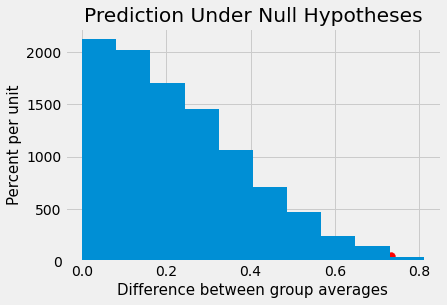

Observed Difference: 0.733522727272728


In [ ]:
distances_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Difference between group averages',fontsize=15)
plt.ylabel('Percent per unit',fontsize=15);
plt.scatter(observed_value, 50, color='red', s=60)
plt.show()
print('Observed Difference:', observed_value)

CALCULATING THE EMPIRICAL P VALUE

In [ ]:
empirical_P = np.count_nonzero(distances >= observed_value)/distances_df.size
empirical_P

0.004

In [ ]:
print('Observed Distance', observed_value)
print('Empirical P-value:',empirical_P)

Observed Distance 0.733522727272728
Empirical P-value: 0.004


CONCLUSION: The empirical P value is too small and observed value is far from the distribution. We reject the Null Hypothesis of randomness and conclude that the patriots drop were too large to reflect the chance variation alone